In [1]:
#|include: false
from IPython.display import Markdown as md

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random as rn
 


:::{.callout-warning}
## Disclaimer 
This blog post is not a financial advice! This is a toy example. This blog post is full of unrealistic assumptions. All numbers are made up. Reach out to a professional financial advisor you trust, if you need financial advise. And most important, take a spreadsheet and do the math yourself with your numbers and your assumptions.
:::


# One dime at what time?

One night I've watched some YouTube videos about investment strategies. One example[^1] was to follow a saving plan and put the same amount of money into funds on a regulare basis, say 100 Euro every month. In the interview a question come up: *What would happen when the market goes down and the portfolio looses value?* The answer was pretty simple: *If you invest regularely then you hit the market when it goes up the one day and when it goes down the other day.* So the volatility doesn't matter that much on the long run. This intuativally made sense. The constant investing smoothes out the volatility. Since you can't predict the stock prices, it's hard to **time** the market, hence predicting when buying is cheap over a short period of time.

Is my intuition about the constant fund investment reasonable? Let's find out in this blog post.

By the way, this question led me also to think a proper refueling strategy witch is covered in [another blog post](2022-12-11-fill-her-up/index.html).


# A fictional asset


In [2]:
#|include: false

timeslots = 200
investment = timeslots * 100
t_max=-1

x = np.linspace(1, timeslots, timeslots)
trend = 1.5
vola = np.random.normal(0, 0.15, timeslots)

y = 10 + x * trend/timeslots + vola


In [10]:
#|echo: false

md(f'''
We will simulate some numbers to come up with a fictional assets price time series. The prices will increase on the long run, but will have some volatility. 
That's how our simulation looks like for {timeslots} timeslots:
''')


We will simulate some numbers to come up with a fictional assets price time series. The prices will increase on the long run, but will have some volatility. 
That's how our simulation looks like for 200 timeslots:


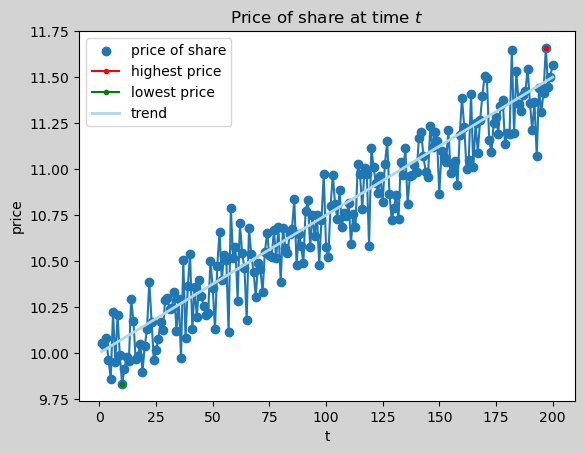

In [12]:
#|echo: false

fig = plt.figure()
ax=plt.axes()
fig.patch.set_facecolor('lightgray')
#fig.patch.set_alpha(0.2)
#ax.set(facecolor = "lightgray")

plt.scatter(x, y, label = 'price of share')
plt.plot(x, y)
#plt.plot(x[vola.argmax()], y[vola.argmax()], marker='o', markersize=3, color="red")
#plt.plot(x[vola.argmin()], y[vola.argmin()], marker='o', markersize=3, color="yellow")
plt.plot(x[y.argmax()], y[y.argmax()], marker='o', markersize=3, color="red", label = 'highest price')
plt.plot(x[y.argmin()], y[y.argmin()], marker='o', markersize=3, color="green", label = 'lowest price')
plt.plot(x, 10+x*trend/timeslots, label = 'trend',linewidth=2, color = 'lightblue')

plt.ylabel('price')
plt.xlabel('t')
plt.title('Price of share at time $t$')
plt.legend()

plt.show()

The <span style="color:lightblue">trend line</span> indecates the general price increase on the long run. The <span style="color:green">yellow dot</span> marks the lowest price and the <span style="color:red">red dot</span> the highest price in the time range.

In [11]:
#|echo: false

best_return = y.max()/y.min()-1

md(f" With an investment of € {investment:,.0f} at the lowest price at t={y.argmin()+1} and selling at the highest price at t={y.argmax()+1} the return is {best_return*100:,.2f}% and yields € {investment*best_return:,.0f}.")

 With an investment of € 20,000 at the lowest price at t=10 and selling at the highest price at t=197 the return is 18.58% and yields € 3,717.

# Two investment strategies

Since we don't know in advance when the price will be lowest and highest, we consider two investment strategies and see how they play out.


In [27]:
#|echo: false

md(f'''
In both strategies we start out with € {investment:,.0f} cash.

- **Strategie 1: One-time investment**

    The entire amount of money is investment at once. We will look how this plays out at various points in time.
    
- **Strategie 2: Continuous investment**

    The cash is split equally over the period in time and in every step in time the same amount is invested.
    
    $ investment_t = {investment:,.0f} / {timeslots:,.0f} = {investment/timeslots:,.2f} $

Let's see how many shares we can buy with bot strategies:
''')



In both strategies we start out with € 20,000 cash.

- **Strategie 1: One-time investment**

    The entire amount of money is investment at once. We will look how this plays out at various points in time.
    
- **Strategie 2: Continuous investment**

    The cash is split equally over the period in time and in every step in time the same amount is invested.
    
    $ investment_t = 20,000 / 200 = 100.00 $

Let's see how many shares we can buy with bot strategies:


In [5]:
#| include: false

cum_amount = (investment/x)*(1/y).cumsum()

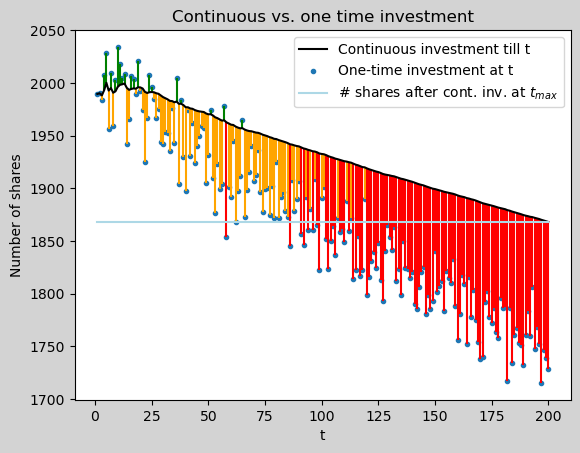

In [6]:
#|echo: false

fig = plt.figure()
fig.patch.set_facecolor('lightgray')

plt.errorbar(x, cum_amount, [(cum_amount-investment/y)*(cum_amount<investment/y),
                                                  -(cum_amount-investment/y)*(cum_amount>investment/y)],
            fmt = 'none',
            ecolor = np.vectorize({0:'r', 1:'orange', 2: 'green'}.get)(((cum_amount)<(investment/y))*1+(cum_amount[t_max]<(investment/y))*1))

plt.plot(x, cum_amount, label = 'Continuous investment till t', color = 'black')
plt.scatter(x,investment/y, label = 'One-time investment at t', marker = '.')
plt.plot(x, np.ones(timeslots)*cum_amount[t_max], label = '# shares after cont. inv. at $t_{max}$', color = 'lightblue')

plt.ylabel('Number of shares')
plt.xlabel('t')
plt.title('Continuous vs. one time investment')
plt.legend()

plt.show()

::: {.column-margin}
<span style="color:blue">**Blue dots:**</span>
$$
onetime(t) = \frac{cash}{price_t}
$$

**Black line:**
$$
\begin{aligned}
cont(t) &= \sum^t_i{ \frac{cash/t}{price_i}} \\
        &= \frac{cash}{t} \sum^t_i{ \frac{1}{price_i}}
\end{aligned}
$$

<span style="color:lightblue">**Light blue line:**</span>
$$
contmax(t) = cont(n)
$$
:::

The <span style="color:blue">**blue dots**</span> mark the number of shares that can perchased when the entire money is invested at once at the given time *t*. 

The **black line** indicates the number of shares that can be buyed when the entire investent is equally spread from *t=0* up to a given *t*.

The <span style="color:lightblue">**light blue line**</span> highlights the number of shares of the last entry of the black line, hence the cash is equally invested over the entire period of time.

A <span style="color:green">**green line**</span> marks the one-time investment that always reach a higher number of shares compared to the continuous investment, regardless of the duration.

A <span style="color:red">**red lines**</span> indicates the one-time investment that can never reach the number of shares of the continuous investment at any time in $0<t<=n$.

An <span style="color:orange">**orange line**</span> marks the one-time investment that has fewer number of shares as the continous investment at the given time, if the entire cash has been equally distrubted to the given *t*. However, if the continous investments are spread for a wider period of time, the one-time investment will be superior to the continuous investment at a later point in time.

With our dummy data the strategie to put a big investment at once is good if the investment can stay invested untouched for a long period of time. If the money needs to shortly be withdrawn from the investment the continous strategie is preferable, regarding number of shares. The tipping point between the strategies is close to $t/2$.

Let's see, next, how the amount of shares result in value at $t=n$, 

In [7]:
#|include: false

cum_cash = investment-x*(investment/timeslots)
cum_inv = ((investment/timeslots)*(1/y).cumsum())*y[t_max]
cum_value = cum_inv + cum_cash

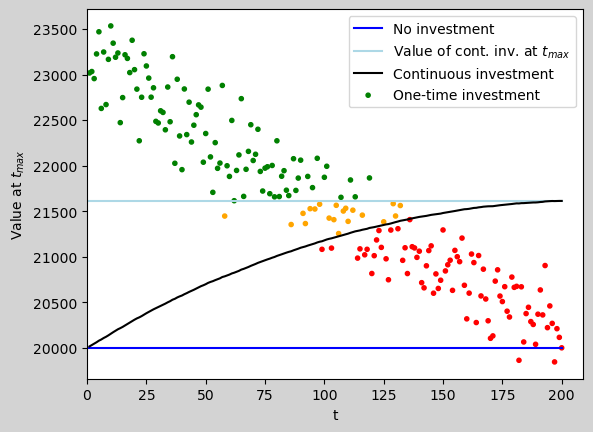

In [8]:
#|echo: false

fig = plt.figure()
fig.patch.set_facecolor('lightgray')

plt.plot(x, np.ones(timeslots)*investment, label = 'No investment', color = 'blue')
plt.plot(x, np.ones(timeslots)*cum_value[t_max], label = 'Value of cont. inv. at $t_{max}$', color = 'lightblue')
plt.plot(x, cum_value, label = 'Continuous investment', color = 'black')
#plt.plot(x, y[t_max]*investment/y, label = 'One-time investment',color='gray')
plt.scatter(x, y[t_max]*investment/y, label = 'One-time investment', marker='.',
           color=np.vectorize({0:'r', 1:'orange', 2: 'green'}.get)(((y[t_max]*investment/y)>(cum_value[t_max]))*1+(((y[t_max]*investment/y)>(cum_value))*1)))

plt.ylabel('Value at $t_{max}$')
plt.xlabel('t')
plt.xlim(0,timeslots+10+t_max)
plt.legend()

plt.show()

::: {.column-margin}
<span style="color:blue">**Blue line:**</span>
$$
cash(t)=cash
$$

**Black line:**
$$
\begin{aligned}
cont(t) &= inv_{acc_t}+cash_{remaining_t} \\ 
        &= p_n*\frac{cash}{n}\sum^t_i{\frac{1}{p_i}} + cash*(1-\frac{t}{n})
\end{aligned}
$$

<span style="color:lightblue">**Light blue line:**</span>
$$
contmax(t) = cont(n)
$$

**Dots:**
$$
onetime(t) = p_n*\frac{cash}{p_t}
$$
:::

The <span style="color:blue">**blue line**</span> is our net worth if we don't invest and keep cash for the entire period of time.

The **black line** inducates the net worth in a continuous investment strategie. At time *t* the number of share that are accumulated sofare are multiplied by the price at the end of the time periode. Also, the remaing cash at time *t* is added to the investment value.

The <span style="color:lightblue">**light blue**</span> line highlights the net worth of the continous investment at the end of the periode of time.

The **dots** indicate the value of a one-time purchase at the end of the periode of time.

A <span style="color:red">**red dot**</span> one-time investment is always worse than the continuous strategie.

A <span style="color:green">**green dot**</span> one-time investment results in a higher net value at the end of the periode compared to the continous investment.

An <span style="color:orange">**orange dot**</span> one-time investment is superior to the continous investment for a certain periode of time. But if the continuous strategie will go on till the end, the orange dot will result in a smaller net worth.

The <span style="color:lightblue">**light blue**</span> and **black line** is highly volatile, since it depend only on one price, the last one. If the period gets shortend the area of the <span style="color:green">**green**</span>, <span style="color:orange">**orange**</span> and <span style="color:red">**red dots**</span> will change accordingly. To reduce volatility the selling can be spread over many periodes, like the continuous strategy to accumulate shares. 

Again, the startegy to invest all at once is preferable, if the investments won't be sold for a long time. If the investment needs to be sold at any time a continous strategie is preferable with this dummy data.

# Conclusion

This example only discribes a taxless scenario where the prices go up on the long run. We also haven't thought at what point(s) in time to sell the shares to actually get the best out of the investment.

From a personal view a continuous strategie seams appealing. This also makes sense considering a continuous income stream (such as salary) which would make this strategy applicable.

But as said in the beginning, that's not a financial advise. So please make up your mind with your own calculations.

[^1]: I've forgot which video it was, maybe something with JL Collins.